# 🔥 1D Heat Equation Solver (Explicit Euler Scheme)

This notebook demonstrates a finite difference solver for the 1D heat equation:
$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

We use the explicit Euler scheme with Dirichlet boundary conditions, and visualize the diffusion over time.

In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from heat_solver_FD import heat_solver_1d

###  Instantiate and Run Solver

In [17]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files'
npz_file = 0

solver = heat_solver_1d(
    x1min=0.0,
    x1max=1.0,
    nx=100,
    tmax=0.1,
    cfl=0.5,
    diff_cons=0.5,
    output_dir=output_dir,
    npz_file=npz_file
)

x, u_store, dt = solver.evolution_euler()
t0 = u_store[0, 0]
tmax = u_store[len(u_store[:,0])-1, 0]

Plot $t = 0$ and $t = t_{max}$

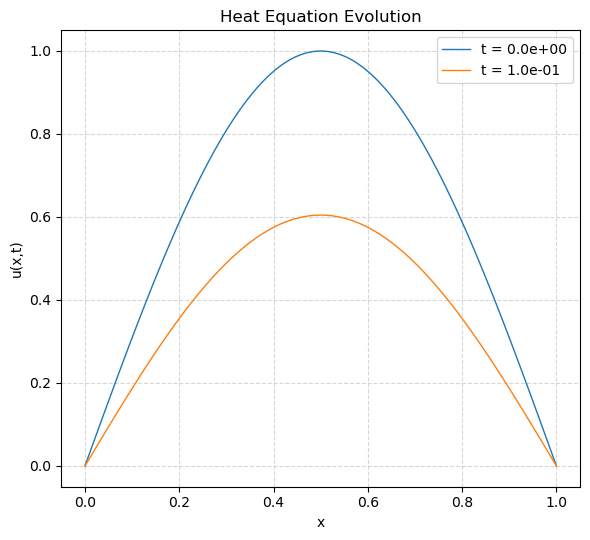

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,5.5))
ax.plot(x, u_store[0, 1:], linestyle='-', linewidth= 1, label='t = %.1e' % t0)
ax.plot(x, u_store[len(u_store[:,0])-2, 1:], linestyle='-', linewidth= 1, label='t = %.1e' % tmax)
ax.legend()
ax.grid(linestyle='--',alpha = 0.5)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Heat Equation Evolution")
plt.tight_layout()

### Making a movie

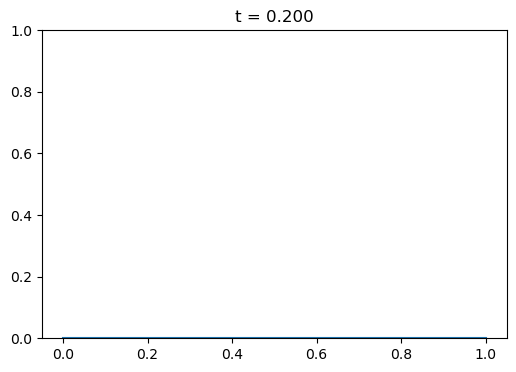

In [9]:

# Create output directory if it doesn't exist
output_dir = "../plot/animations"
os.makedirs(output_dir, exist_ok=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot(x, u_store[0, 1:])
ax.set_ylim(0, 1)
ax.set_title("Heat Equation Evolution")

# Animation function
def animate(i):
    line.set_ydata(u_store[i, 1:])
    ax.set_title(f"t = {u_store[i, 0]:.3f}")
    return line,

# Build animation
ani = animation.FuncAnimation(
    fig, animate, frames=range(0, len(u_store), 50), interval=50
)

# Save to MP4
ani.save(os.path.join(output_dir, "heat_equation.mp4"), writer="ffmpeg", fps=20)

### ✅ Summary

- The explicit Euler scheme was used to solve the 1D heat equation.
- CFL condition was enforced for stability.
- Time evolution was visualized and saved for downstream ML modeling or analysis.

### Load the data for ML model

In [2]:
from ml_model_cnn import data_generator
from ml_model_cnn import ml_models
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files'

In [3]:
data = data_generator(output_dir, dim=1, csv=1, x_res=100)
Xdata, Ydata = data.read_1d()
Xdata.describe()

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,...,u90,u91,u92,u93,u94,u95,u96,u97,u98,u99
count,999.0,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0
mean,0.0,0.024926,0.049828,0.074679,0.099455,0.124131,0.148682,0.173083,0.197309,0.221338,...,0.221338,0.197309,0.173083,0.148682,0.124131,0.099455,0.074679,0.049828,0.024926,0.0
std,0.0,0.003614,0.007225,0.010828,0.014420,0.017998,0.021558,0.025096,0.028609,0.032093,...,0.032093,0.028609,0.025096,0.021558,0.017998,0.014420,0.010828,0.007225,0.003614,0.0
min,0.0,0.019185,0.038350,0.057477,0.076546,0.095538,0.114434,0.133214,0.151860,0.170354,...,0.170354,0.151860,0.133214,0.114434,0.095538,0.076546,0.057477,0.038350,0.019185,0.0
25%,0.0,0.021753,0.043485,0.065172,0.086794,0.108328,0.129754,0.151049,0.172191,0.193161,...,0.193161,0.172191,0.151049,0.129754,0.108328,0.086794,0.065172,0.043485,0.021753,0.0
50%,0.0,0.024665,0.049306,0.073897,0.098414,0.122831,0.147125,0.171271,0.195244,0.219021,...,0.219021,0.195244,0.171271,0.147125,0.122831,0.098414,0.073897,0.049306,0.024665,0.0
75%,0.0,0.027968,0.055907,0.083790,0.111589,0.139276,0.166822,0.194200,0.221383,0.248343,...,0.248343,0.221383,0.194200,0.166822,0.139276,0.111589,0.083790,0.055907,0.027968,0.0
max,0.0,0.031712,0.063392,0.095008,0.126529,0.157922,0.189156,0.220200,0.251022,0.281591,...,0.281591,0.251022,0.220200,0.189156,0.157922,0.126529,0.095008,0.063392,0.031712,0.0


### Split the data and train the model

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2, 
                                                    shuffle=False)
ml_models = ml_models(nx = 100)
my_model = ml_models.cnn_model_1d()

In [5]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_l1 (Conv1D)                │ (None, 100, 96)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l2 (Conv1D)                │ (None, 100, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Conv1D)                 │ (None, 100, 1)         │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,945 (74.00 KB)

 Trainable params: 18,945 (74.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Set learning rate here
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
my_model.build(input_shape=(None, 100, 1))  # assuming nx = 100

my_model.compile(loss='mse', optimizer=optimizer)

In [7]:
history = my_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1349 - val_loss: 8.0113e-04
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 8.2860e-05
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6967e-05 - val_loss: 1.0367e-05
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0668e-05 - val_loss: 3.5831e-06
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9687e-06 - val_loss: 1.8636e-06
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9945e-06 - val_loss: 1.0441e-06
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0251e-06 - val_loss: 5.9825e-07
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6660e-07 - val_loss: 4.2536e-07
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8757e-07 - val_loss: 3.4740e-07
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0083e-07 - val_loss: 3.2454e-07
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6381e-07 - val_loss: 2.9346e-07
Epoch

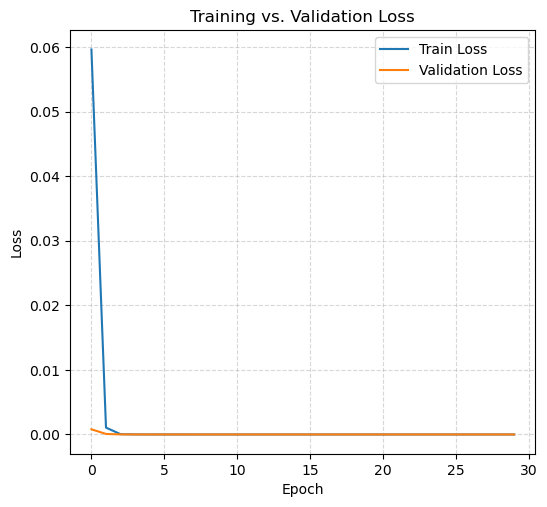

In [28]:

fig,ax = plt.subplots(1,1,figsize=(6,5.5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
ax.grid(linestyle='--',alpha = 0.5)
plt.show()

In [8]:
u_pred = my_model.predict(X_test)
print(u_pred.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
(200, 100, 1)


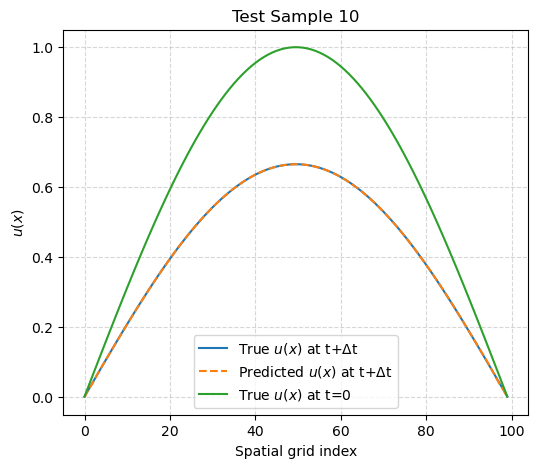

In [34]:

i = 10  # which test example to look at
Y_test_np = Y_test.values[..., np.newaxis]

fig,ax = plt.subplots(1,1,figsize=(6,5))
plt.plot(Y_test_np[i, :, 0], label='True $u(x)$ at t+Δt')
plt.plot(u_pred[i, :, 0], '--', label='Predicted $u(x)$ at t+Δt')
plt.plot(X_train.values[..., np.newaxis][0, :, 0], label='True $u(x)$ at t=0')

plt.legend()
plt.xlabel('Spatial grid index')
plt.ylabel('$u(x)$')
plt.title(f'Test Sample {i}')
ax.grid(linestyle='--',alpha = 0.5)
plt.show()

### Predict the last snapshot, based on the last snapshot in the test set.

The train and test set contains the snapshots from 0 - t_final - 1  

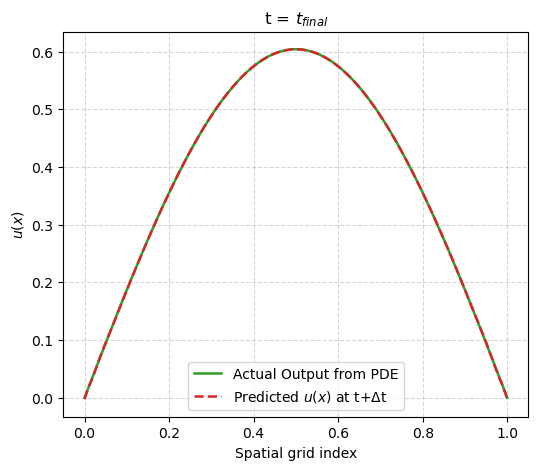

In [33]:
u_tn = tf.convert_to_tensor(X_test.iloc[[-1]].values.reshape(1, -1, 1), dtype=tf.float32)
output = my_model(X_test.to_numpy().reshape(-1, 100, 1).astype(np.float32))  # trigger trace
u_pred_new = my_model(u_tn, training=False)  # skip .predict(), call model directly

x = np.linspace(0, 1, Y_test.shape[1])  
data = pd.read_csv('../data/csv_files/data_1000.csv')
var_u = data.filter(like='u_t').values.flatten()

fig,ax = plt.subplots(1,1,figsize=(6,5))
plt.plot(data['x'],var_u, color='tab:green', linewidth=1.8, label='Actual Output from PDE')
plt.plot(x, u_pred_new[-1, :, 0], '--', color='tab:red', linewidth=1.8, label='Predicted $u(x)$ at t+Δt')
plt.legend()
plt.xlabel('Spatial grid index')
plt.ylabel('$u(x)$')
plt.title(r't = $t_{final}$')
ax.grid(linestyle='--',alpha = 0.5)
plt.show()